# **Environmental Sound Classification**

## **Task Overview**

Датасет различных звуков окружающей среды (собака, дождь, плач ребёнка и т. д.).

### **Part 1: Create Dataset**

Первым делом давайте скачаем датасет и прилагающие csv файлы с метками класса.

In [ ]:
!gdown 1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO # sound_classification_dataset.zip
!gdown 1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT # train.csv
!gdown 1my0RPDQdTxvCGmnZei06tiXgKko3R4o4 # valid.csv
!gdown 1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks # test.csv

Downloading...
From (original): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO
From (redirected): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO&confirm=t&uuid=2f09a0c2-a081-4280-9973-f562f75cd216
To: /content/sound_classification_dataset.zip
100% 645M/645M [00:08<00:00, 79.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT
To: /content/train.csv
100% 3.09k/3.09k [00:00<00:00, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1my0RPDQdTxvCGmnZei06tiXgKko3R4o4
To: /content/valid.csv
100% 1.06k/1.06k [00:00<00:00, 4.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks
To: /content/test.csv
100% 719/719 [00:00<00:00, 3.27MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Разархивируйте zip файл, где содержатся wav файлы датасета.

In [ ]:
import zipfile
import os

# Путь к zip-файлу
zip_path = "/content/drive/MyDrive/sound_classification_dataset.zip"
zip_path = "/content/sound_classification_dataset.zip"
extract_path = "/content/"

# Создаем папку для распаковки
os.makedirs(extract_path, exist_ok=True)

# Распаковываем
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Распаковка завершена!")

Распаковка завершена!


In [ ]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install audiomentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: soxr
    Found existing installation: soxr 1.0.0
    Uninstalling soxr-1.0.0:
      Successfully uninstalled soxr-1.0.0


In [ ]:
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df

,filename,category
0,1-100032-A-0.wav,dog
1,1-110389-A-0.wav,dog
2,1-17367-A-10.wav,rain
3,1-187207-A-20.wav,crying_baby
4,1-211527-A-20.wav,crying_baby
...,...,...
115,3-170383-A-38.wav,clock_tick
116,3-171012-A-38.wav,clock_tick
117,3-171041-A-38.wav,clock_tick
118,3-180256-A-0.wav,dog


In [ ]:
test_df

,filename
0,5-151085-A-20.wav
1,5-181766-A-10.wav
2,5-187979-A-21.wav
3,5-188655-A-10.wav
4,5-193339-A-10.wav
5,5-194533-A-21.wav
6,5-194892-A-10.wav
7,5-195710-A-10.wav
8,5-198321-A-10.wav
9,5-198411-A-20.wav


Для этого задания при создании датасета вам нужно сделать обработку аудио данных следующим образом:
* **Sample rate --> 16000**: ресэмплируйте оригинальный `sample_rate` в `sample_rate = 16000`
* **Stereo --> Mono**: преобразуйте многоканальное аудио в моноканальное
* **Length = X secs:** чтобы суметь создать батч, вам необходимо, чтобы длина всех ваших аудиозаписей была одинаковой, поэтому вам нужно зафиксировать длину всех аудиозаписей, и если аудио меньше заданной длины, то сделайте паддинг, если больше, обрежьте аудио до заданной длины.

* **Audio Augmentation:** используйте разные аугментации. Вы можете воспользоваться библиотеками:
  * [torchaudio.transforms](https://docs.pytorch.org/audio/main/transforms.html)
  * [torch_audiomentations](https://github.com/iver56/torch-audiomentations)

**ВАЖНО**: в этом домашнем задании вам нельзя переводить `wav` в мелспектрограммы.

Внизу для удобства предоставлен псевдокод, который можно заполнить необходимыми функциями, но вы можете видоизменять его как вам будет удобно.

In [ ]:
import torch
import torchaudio
from torch.utils.data import Dataset
import pandas as pd
import os

import audiomentations as aud
from audiomentations import Compose, AddGaussianNoise, PitchShift, TimeStretch, Gain

class SimpleAudioDataset(Dataset):
    """A dataset to load, preprocess, and augment audio files."""

    def __init__(self, df, folder, sr = 16000, length = 4, do_augmentation=False, is_train=True):
        self.df = df
        self.folder = folder
        self.sr = sr
        self.length = length * self.sr
        self.do_augmentation = do_augmentation
        self.is_train = is_train

        self.resampler = torchaudio.transforms.Resample(orig_freq=44100, new_freq=sr)
        self.normalize = Compose([aud.Normalize(p=1.0)])
        if self.do_augmentation:
            self.augment_raw_audio = Compose(
                [
                    aud.Normalize(),
                    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.006, p=0.5),
                    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
                    TimeStretch(min_rate=0.75, max_rate=1.25, p=0.3),
                    Gain(min_gain_db=-4, max_gain_db=4, p=0.5),
                    aud.TimeMask(min_band_part=0.1, max_band_part=0.2, p=0.2),
                    aud.HighPassFilter(min_cutoff_freq=150, max_cutoff_freq=400, p=0.2)
                ]
            )


    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # 1. Get the file path and label
        audio_file_path = self.df.iloc[index]['filename']
        if self.is_train:
            label = self.df.iloc[index]['category']
        else:
            label = -1

        # 2. LOAD: Load the raw audio file
        signal, sr = torchaudio.load(self.folder + audio_file_path)

        # 3. PREPROCESS: Apply the preprocessing steps
        signal = self._resample(signal, sr) # Resample to the sample rate 16000
        signal = self._stereo_to_mono(signal) # Converts (channels, samples) -> (samples,)
        signal = signal.squeeze(0)

        #Assert
        #print(signal.shape)

        # 4. AUGMENT: Apply augmentations only if training
        signal = signal.numpy()
        if self.do_augmentation:
            signal = self._augmentation(signal)


        #Normalization.
        signal = self.normalize(signal, self.sr)
        signal = self._cut_or_pad(torch.tensor(signal)) # State fixed length


        #Adding dim
        signal = signal.unsqueeze(0)

        # 5. RETURN: We now have a clean, standardized waveform and its label
        return signal, label

    # --- The Core Preprocessing Functions ---
    def _resample(self, signal, original_sr):
        self.resampler.orig_freq = original_sr
        signal = self.resampler(signal)

        return signal

    def _stereo_to_mono(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)

        return signal.squeeze(1)

    def _cut_or_pad(self, signal):

        curr_length = signal.shape[0]

        if curr_length > self.length:
            signal = signal[0:self.length]
        else:
            pad_length = self.length - curr_length
            signal = torch.nn.functional.pad(signal, (0, pad_length))

        return signal

    def _augmentation(self, signal):
        return self.augment_raw_audio(signal, self.sr)


Сравним оригинальные и обработанные аудиозаписи:

In [ ]:
fldr = '/content/content/sound_classification_dataset/'

train_dataset = SimpleAudioDataset(train_df, folder=fldr, do_augmentation=True)
valid_dataset = SimpleAudioDataset(valid_df, folder=fldr , do_augmentation=False)

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Audio

audio_file_path = train_df.iloc[67]['filename']
orig_audio, sr = torchaudio.load(fldr + audio_file_path)

Audio(orig_audio, rate=sr)

In [ ]:
aug_audio = train_dataset.__getitem__(67)[0]
Audio(aug_audio, rate=16000)

Функция для отрисовки loss/accuracy.

In [ ]:
def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies):
    """
    Plot training and validation metrics
    """
    epochs = range(1, len(train_losses) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Test Loss', linewidth=2)
    ax1.set_title('Training and Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Valid Accuracy', linewidth=2)
    ax2.set_title('Training and Valid Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [ ]:
labels_to_nums = {l:i for i, l in enumerate(train_df['category'].unique())}
nums_to_labels = {i:l for i, l in enumerate(train_df['category'].unique())}
print(labels_to_nums)

{'dog': 0, 'rain': 1, 'crying_baby': 2, 'clock_tick': 3, 'sneezing': 4}


### **Second Model (Best Score): CNN + RNN**

In [ ]:
import torch.nn as nn

class CRNN(nn.Module):
    def __init__(self, hidden_size=64, num_classes=5):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=160, stride=3, padding=80),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Conv1d(16, 16, kernel_size=40, stride=1, padding=20),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Conv1d(16, 64, kernel_size=20, stride=2, padding=10),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.AdaptiveAvgPool1d(1)
        )


        self.rnn = nn.GRU(
            input_size=64,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
            bidirectional=True,
            dropout=0.2
        )

        self.rnn_size = 2*hidden_size

        self.fc = nn.Sequential(
            nn.BatchNorm1d(self.rnn_size),
            nn.Linear(self.rnn_size, 32),
            nn.Sigmoid(),
            nn.Linear(32, 5)
        )

    def forward(self, x):
        output = self.conv_layers(x)
        output = output.transpose(1, 2)

        rnn_output, _ = self.rnn(output)
        output = rnn_output[:, -1, :]

        output = self.fc(output)
        return output


In [ ]:
# Model, Loss, Optimizer
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = "cuda" if torch.cuda.is_available() else "cpu"
model = CRNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.35,
    patience=10,
    min_lr=5e-6
)

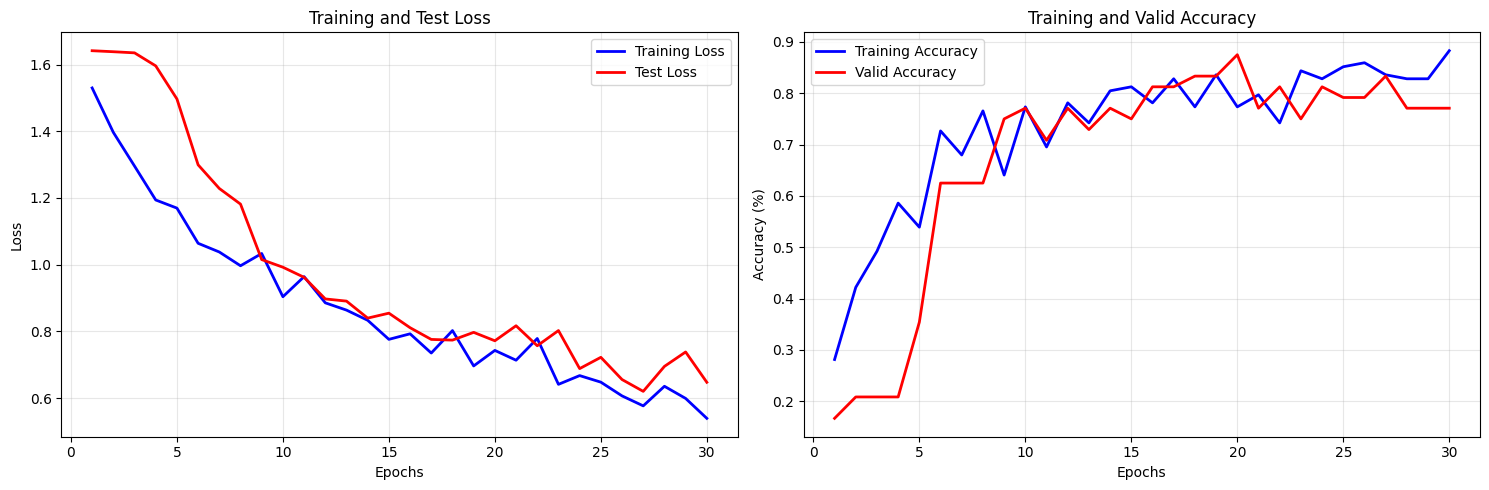

In [ ]:
from torch.utils.data import DataLoader
from IPython.display import clear_output

batch_size = 16

train_dataset = SimpleAudioDataset(train_df, folder=fldr, do_augmentation=True, is_train=True)
valid_dataset = SimpleAudioDataset(valid_df, folder=fldr, do_augmentation=False, is_train=True)
test_dataset = SimpleAudioDataset(test_df, folder=fldr, do_augmentation=False, is_train=False)

# Initialize datasets & dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)


train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

n_epochs = 30
for epoch in range(n_epochs):

    epoch_train_losses, epoch_valid_losses = [], []
    epoch_train_accuracies, epoch_valid_accuracies = [], []

    # Train
    model.train()

    for signals, labels in train_loader:

        optimizer.zero_grad()

        # load data to device
        signals = signals.to(device)
        labels = torch.tensor([labels_to_nums[l] for l in labels]).to(device)

        # Forward pass
        predictions = model(signals)
        train_loss = criterion(predictions, labels)

        _, predicted = torch.max(predictions, 1)
        train_accuracy = (predicted == labels).float().mean().item()

        epoch_train_losses.append(train_loss.item())
        epoch_train_accuracies.append(train_accuracy)

        train_loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        for signals, labels in valid_loader:
            # load data to device
            signals = signals.to(device)
            labels = torch.tensor([labels_to_nums[l] for l in labels]).to(device)

            # Forward pass
            predictions = model(signals)
            valid_loss = criterion(predictions, labels)

            _, predicted = torch.max(predictions, 1)
            valid_accuracy = (predicted == labels).float().mean().item()

            epoch_valid_losses.append(valid_loss.item())
            epoch_valid_accuracies.append(valid_accuracy)

    epoch_train_loss = np.mean(epoch_train_losses)
    epoch_train_acc = np.mean(epoch_train_accuracies)
    epoch_valid_loss = np.mean(epoch_valid_losses)
    epoch_valid_acc = np.mean(epoch_valid_accuracies)

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_acc)

    scheduler.step(epoch_valid_loss)

    plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
    clear_output(wait=True)

### **First Model. Simple CNN.**

In [ ]:
class SimpleCNN(nn.Module):

    def __init__(self, num_classes=5):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=160, stride=3, padding=80),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Conv1d(16, 16, kernel_size=40, stride=1, padding=20),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Conv1d(16, 16, kernel_size=20, stride=2, padding=10),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Conv1d(16, 32, kernel_size=10, stride=2, padding=5),
            nn.BatchNorm1d(32),
            nn.ReLU(),

            nn.Conv1d(32, 32, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(32),
            nn.ReLU(),

            nn.AdaptiveAvgPool1d(1)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(32, 16),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(16, num_classes)
        )

    def forward(self, x):
        features = self.conv_layers(x)
        features = features.squeeze(-1)
        return self.classifier(features)

In [ ]:
# Model, Loss, Optimizer
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.35,
    patience=10,
    min_lr=5e-6
)

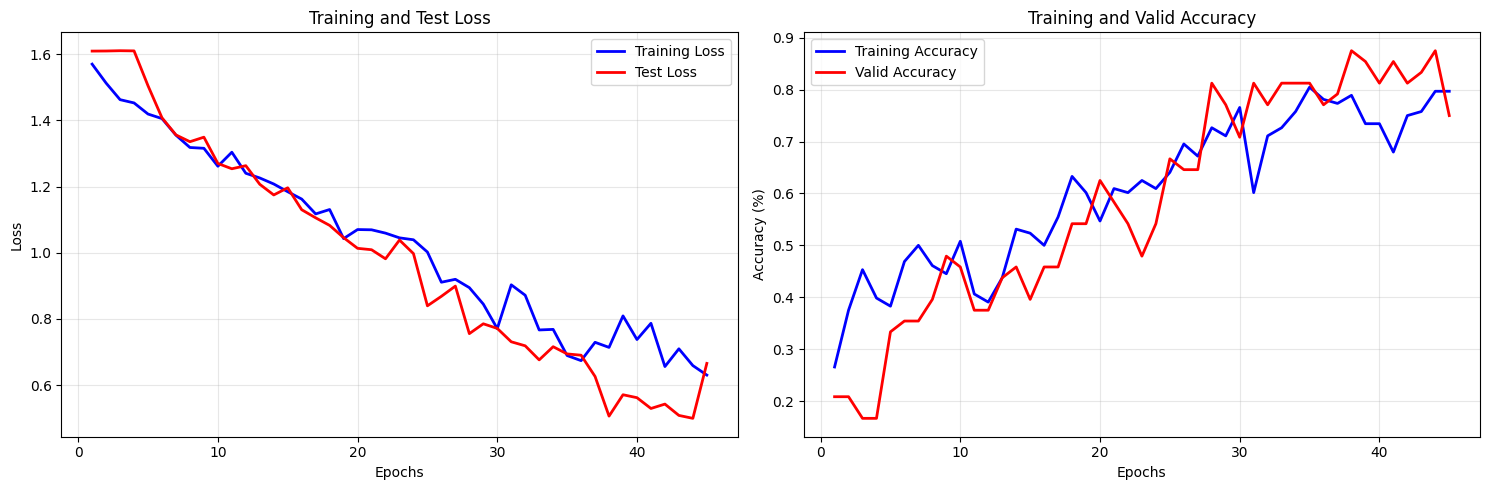

In [ ]:
from torch.utils.data import DataLoader
from IPython.display import clear_output

batch_size = 16

train_dataset = SimpleAudioDataset(train_df, folder=fldr, do_augmentation=True, is_train=True)
valid_dataset = SimpleAudioDataset(valid_df, folder=fldr, do_augmentation=False, is_train=True)
test_dataset = SimpleAudioDataset(test_df, folder=fldr, do_augmentation=False, is_train=False)

# Initialize datasets & dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)


train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

n_epochs = 45
for epoch in range(n_epochs):

    epoch_train_losses, epoch_valid_losses = [], []
    epoch_train_accuracies, epoch_valid_accuracies = [], []

    # Train
    model.train()

    for signals, labels in train_loader:

        optimizer.zero_grad()

        # load data to device
        signals = signals.to(device)
        labels = torch.tensor([labels_to_nums[l] for l in labels]).to(device)

        # Forward pass
        predictions = model(signals)
        train_loss = criterion(predictions, labels)

        _, predicted = torch.max(predictions, 1)
        train_accuracy = (predicted == labels).float().mean().item()

        epoch_train_losses.append(train_loss.item())
        epoch_train_accuracies.append(train_accuracy)

        train_loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        for signals, labels in valid_loader:
            # load data to device
            signals = signals.to(device)
            labels = torch.tensor([labels_to_nums[l] for l in labels]).to(device)

            # Forward pass
            predictions = model(signals)
            valid_loss = criterion(predictions, labels)

            _, predicted = torch.max(predictions, 1)
            valid_accuracy = (predicted == labels).float().mean().item()

            epoch_valid_losses.append(valid_loss.item())
            epoch_valid_accuracies.append(valid_accuracy)



    epoch_train_loss = np.mean(epoch_train_losses)
    epoch_train_acc = np.mean(epoch_train_accuracies)
    epoch_valid_loss = np.mean(epoch_valid_losses)
    epoch_valid_acc = np.mean(epoch_valid_accuracies)

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_acc)

    scheduler.step(epoch_valid_loss)

    plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
    clear_output(wait=True)

### **Create submission**

Вам нужно:
* **1 шаг.** сделать предсказания для `test.csv` при помощи лучшей модели
* **2 шаг.** создать `submission.csv` файл с колонкой `category`, положить туда свои предсказания и сохранить файл.

In [ ]:
test_dataset = SimpleAudioDataset(test_df, folder=fldr, do_augmentation=False, is_train=False)

audio_list = []
for i in range(len(test_dataset)):
    audio, label = test_dataset[i]
    audio_list.append(audio)

test_tensor = torch.stack(audio_list)
test_tensor.shape

torch.Size([40, 1, 64000])

In [ ]:
with torch.no_grad():
    y_test_pred = model(test_tensor.to(device))

ans = [nums_to_labels[int(i)] for i in y_test_pred.argmax(1)]
print(ans)

['crying_baby', 'rain', 'sneezing', 'rain', 'clock_tick', 'sneezing', 'rain', 'rain', 'rain', 'crying_baby', 'crying_baby', 'dog', 'rain', 'rain', 'crying_baby', 'dog', 'clock_tick', 'sneezing', 'clock_tick', 'rain', 'dog', 'dog', 'rain', 'crying_baby', 'crying_baby', 'clock_tick', 'clock_tick', 'sneezing', 'dog', 'dog', 'dog', 'dog', 'sneezing', 'sneezing', 'sneezing', 'sneezing', 'dog', 'dog', 'clock_tick', 'dog']


In [ ]:
submission = pd.read_csv("/content/test.csv")
submission['category'] = ans
submission.to_csv("/content/submission.csv", index=False)



### **Report**

####Аугментация и предобработка звуковых сигналов.

0) Нормализуем сигнал.

1) В классе SimpleAudioDataset была добавлена возможность аугментации исходного сигнала. С некоторой вероятностью к сигналу применялись добавление шума, изменение высоты тона (остановился на варианте +-2 полутона, внося совсем легкие изменения), time-stretching (процесс изменения скорости или продолжительности аудиосигнала без изменения его высоты тона), эквализация. Параметры были подобраны так, чтобы исходный сигнал в среднем искажался не сильно (человеческое ухо могло определить класс).

2) После этого сигнал нормализуется еще раз.

3) Если полученный сигнал оказался длиннее 4 секунд, его конец обрезался. По-хорошему, фрагмент из аудиозаписи надо выбирать случайным образом так, чтобы средняя громкость была выше некоторого заранее заданного порога.

####Оптимизация.
При lr >= 1e-4 модели были склонны к переобучению, иначе обучались медленно, поэтому был добавлен scheduler.


####1d-CNN
Модель, представленная в блокноте, имеет порядка 29000 параметров, предназначена для обучения на аугментированных данных (если обучать только на сырых - рискуем переобучиться).

Помимо этого пробовал добавлять MaxPool после сверточных слоев, такие модели обучались менее стабильно.

#### **Лучший score ~0.7 на тестовых данных.**
####1d-CNN + RNN (GRU)
Модель представляет собой усовершенствование предыдущей CNN-архитектуры за счет добавления рекуррентного слоя GRU, что позволяет более эффективно учитывать долгосрочные временные зависимости в аудиосигналах.



